In [31]:
import matplotlib.pyplot as plt
import os
height = 14
width = height*0.6
plt.rcParams["figure.figsize"] = (height,width)
import numpy as np
# plt.style.use('seaborn-muted')


hierarchical = False

Dataset = "CIFAR10/"
# Dataset = "CIFAR100/"
# Dataset = "CIFAR100/hierarchical/"
# hierarchical = True
# Dataset = "MNIST/"
# Dataset = 'sat-6/'

# model = "ResNet18"
model = "BranchedResNet18"
# model = "BranchedDenseNet18"


figure_directory = "../trained-models/"+model+"/"+Dataset

sub = ''
# sub = "single-branch-figures/"
# sub = "second-branch-figures/"
# sub = "single-second-branch-figures"
# sub = "multi-branch-figures/"
# sub = "single-third-branch-figures"
# sub = 'train-regime/'
# sub = "pretrained/"
# sub = "finetuned/"
# sub = 'hierarchical/'

sub_directory = 'figures/'+sub

try:
    os.mkdir(figure_directory + sub_directory)
    print('Figure Folder Created..')
except FileExistsError:
    print('Figure Folder Exists..')
    
save_directory = figure_directory + sub_directory

if hierarchical:
    probe_dir = "/linear-probe-values/hierarchical/accuracy/"
else:
    probe_dir = "/linear-probe-values/accuracy/"

def load(directory,name,runs):
    run = 0
    values = np.load(directory+name+"-"+str(run)+".pth.npy")
    for run in range(run+1,runs):
        value = np.load(directory+name+"-"+str(run)+".pth.npy")
        values = np.vstack((values,value))
        
    print(values[2,:])
        
    means = np.mean(values,axis=0)
    stds = np.std(values,axis=0)
    
    return means,stds  


single_branch_weights = ['020']
single_means = list()
single_stds = list()
single_branches = list()
for weighting in single_branch_weights: 
    directory = figure_directory+"w"+weighting+probe_dir
    mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
    branch_weights = np.load(figure_directory+"w"+weighting+"/metrics/branch-weights-"+model+".npy")
    single_branches.append(branch_weights)
    single_means.append(mean)
    single_stds.append(std)
for i in range(len(single_branch_weights)):
    single_branch_weights[i] = single_branch_weights[i][0:1]+'.'+single_branch_weights[i][1:]


# pretrained_weights = ['02','04','06','08']
# pretrained_means = list()
# pretrained_stds = list()
# pretrained_branches = list()
# for weighting in pretrained_weights: 
#     directory = figure_directory+"ptr_wb1"+weighting+"_a"+probe_dir
#     mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
#     branch_weights = np.load(figure_directory+"ptr_wb1"+weighting+"_a"+"/metrics/branch-weights-"+model+".npy")
#     pretrained_branches.append(branch_weights)
#     pretrained_means.append(mean)
#     pretrained_stds.append(std)
# for i in range(len(pretrained_weights)):
#     pretrained_weights[i] = pretrained_weights[i][0:1]+'.'+pretrained_weights[i][1:]+'0'
    
# finetuned_weights = ['02','04','06','08']
# finetuned_means = list()
# finetuned_stds = list()
# finetuned_branches = list()
# for weighting in finetuned_weights: 
#     directory = "../trained-models/ResNet18/"+Dataset+"ft_wb1"+weighting+probe_dir
#     mean,std = load(directory,"best-ResNet18-CIFAR-10",3)
#     branch_weights = np.load("../trained-models/ResNet18/"+Dataset+"ft_wb1"+weighting+"/metrics/pretrained-branch-weights-ResNet18.npy")
#     finetuned_branches.append(branch_weights)
#     finetuned_means.append(mean)
#     finetuned_stds.append(std)

# hierarchical_weights = ['02','04','06','08']
# hierarchical_means = list()
# hierarchical_stds = list()
# hierarchical_branches = list()
# for weighting in hierarchical_weights: 
#     directory = figure_directory+"hierarchical/hwb1"+weighting+probe_dir
#     mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
#     branch_weights = np.load(figure_directory+"hierarchical/hwb1"+weighting+"/metrics/branch-weights-"+model+".npy")
#     hierarchical_branches.append(branch_weights)
#     hierarchical_means.append(mean)
#     hierarchical_stds.append(std)
# for i in range(len(hierarchical_weights)):
#     hierarchical_weights[i] = hierarchical_weights[i][0:1]+'.'+hierarchical_weights[i][1:]+'0'
    
# second_branch_weights = ['02']
# second_means = list()
# second_stds = list()
# second_branches = list()
# for weighting in second_branch_weights: 
#     directory = figure_directory+"wb102-b2"+weighting+"/linear-probe-values/accuracy/"
#     branch_weights = np.load(figure_directory+"wb102-b2"+weighting+"/metrics/branch-weights-"+model+".npy")
#     second_branches.append(branch_weights)
#     mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
#     second_means.append(mean)
#     second_stds.append(std)

second_branch_weights = ['02']
second_means = list()
second_stds = list()
second_branches = list()
for weighting in second_branch_weights: 
    directory = figure_directory+"wb102-b2"+weighting+probe_dir
    branch_weights = np.load(figure_directory+"wb102-b2"+weighting+"/metrics/branch-weights-"+model+".npy")
    second_branches.append(branch_weights)
    mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
    second_means.append(mean)
    second_stds.append(std)
    
# third_branch_weights = ['02','04','06','08','10']
# third_means = list()
# third_stds = list()
# third_branches = list()
# for weighting in third_branch_weights: 
#     directory = figure_directory+"wb3"+weighting+"/linear-probe-values/accuracy/"
#     branch_weights = np.load(figure_directory+"wb3"+weighting+"/metrics/branch-weights-"+model+".npy")
#     third_branches.append(branch_weights)
#     mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
#     third_means.append(mean)
#     third_stds.append(std)  
    
third_branch_weights = ['02']
third_means = list()
third_stds = list()
third_branches = list()
for weighting in third_branch_weights: 
    directory = figure_directory+"wb102-b3"+weighting+"/linear-probe-values/accuracy/"
    branch_weights = np.load(figure_directory+"wb102-b3"+weighting+"/metrics/branch-weights-"+model+".npy")
    third_branches.append(branch_weights)
    mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
    third_means.append(mean)
    third_stds.append(std)

multi_branch_weights = ['wb102-b202-b302']
multi_means = list()
multi_stds = list()
multi_branches = list()
for weighting in multi_branch_weights: 
    directory = figure_directory+weighting+"/linear-probe-values/accuracy/"
    branch_weights = np.load(figure_directory+weighting+"/metrics/branch-weights-"+model+".npy")
    multi_branches.append(branch_weights)
    mean,std = load(directory,"best-"+model+"-CIFAR-10",3)
    multi_means.append(mean)
    multi_stds.append(std)

    
# for i in range(len(weights)):
#     weights[i] = weights[i][0:1]+'.'+weights[i][1:]+'0'

# run = "MNIST-SGDR"
# run = "CIFAR100-SGDR"
# run = "../CIFAR100-SGDR"
run='300_epoch'
# run='200-epoch'
# run='400_epoch'
# run = 'unbranched'
    
unbranched_mean,unbranched_std = load("../trained-models/ResNet18/"+Dataset+"/"+ run+probe_dir,"best-ResNet18-CIFAR-10",3)
# unbranched_mean,unbranched_std = load("../trained-models/DenseNet18/"+Dataset+"/"+ run+probe_dir,"best-DenseNet18-CIFAR-10",3)

Figure Folder Exists..
[0.49248418 0.5430182  0.62302214 0.7210245  0.7137065  0.7385285
 0.7563291  0.7407041  0.770174   0.7730419  0.7933149  0.805182
 0.83148736 0.84295887 0.8493869  0.84998024 0.851068   0.858485  ]
[0.47191456 0.54242486 0.61748415 0.7137065  0.7162777  0.74693435
 0.7642405  0.79380935 0.7916337  0.80122626 0.8089399  0.8166535
 0.82140034 0.82842165 0.8313885  0.8318829  0.83524525 0.8350475 ]
[0.4464992  0.52966774 0.63617486 0.7328916  0.725178   0.7604826
 0.7618671  0.7457476  0.7852057  0.794996   0.81546676 0.8334652
 0.8432555  0.8424644  0.84849685 0.8476068  0.8506725  0.8525514 ]
[0.44343355 0.554193   0.5885087  0.7226068  0.7174644  0.7439676
 0.7724486  0.8022152  0.809731   0.8162579  0.82466376 0.8299051
 0.83109176 0.83662975 0.83702534 0.83613527 0.8337619  0.83425635]
[0.48388055 0.5144383  0.53194225 0.57090586 0.5679391  0.65971124
 0.70114714 0.7070807  0.738924   0.7523734  0.792326   0.79885286
 0.8460245  0.84721124 0.85492486 0.8551226

In [ ]:
# print(pretrained_branches)

In [32]:
def get_values(values):
    return(np.arange(1,values.shape[0]+1))

def plot_accuracies(accuracies,errors,name,color,branched=False):
# 
    layers = get_values(accuracies)
    if branched == True:
        plt.plot(layers,accuracies,'-.', label = name, color = color)
        plt.fill_between(layers, accuracies-errors, accuracies+errors,alpha=0.4, color = color)
    if branched == False:
        plt.plot(layers,accuracies, label = name, color = color)
        plt.fill_between(layers, accuracies-errors, accuracies+errors,alpha=0.4, color = color)
        
        
def get_label(branch_weights):
    string = "("
    for weight in branch_weights:
        weight = np.round(weight,decimals=3)
        string = string + str(weight) + " : "
    string = string[:-3]+')'
    return(string)

In [ ]:
# get_label(single_branches[0])

NameError: name 'single_branches' is not defined

../trained-models/BranchedResNet18/CIFAR10/figures/


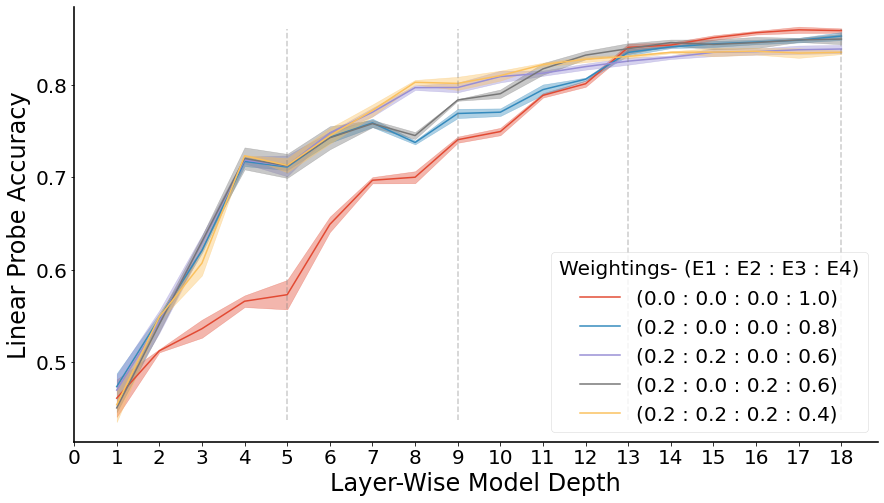

In [41]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()

color = 0

plot_accuracies(unbranched_mean,unbranched_std,'(0.0 : 0.0 : 0.0 : 1.0)',('C'+str(color)))
color=color+1

for model in range(len(single_branch_weights)):
    plot_accuracies(single_means[model],single_stds[model],get_label(single_branches[model]),('C'+str(color)))
    color=color+1

for model in range(len(second_branch_weights)):
    plot_accuracies(second_means[model],second_stds[model],get_label(second_branches[model]),('C'+str(color)))
    color=color+1
    
for model in range(len(third_branch_weights)):
    plot_accuracies(third_means[model],third_stds[model],get_label(third_branches[model]),('C'+str(color)))
    color=color+1
    
for model in range(len(multi_branch_weights)):
    plot_accuracies(multi_means[model],multi_stds[model],get_label(multi_branches[model]),('C'+str(color)))
    color=color+1
    
# for model in range(len(pretrained_weights)):
#     plot_accuracies(pretrained_means[model],pretrained_stds[model],('Pretrained: ' + get_label(pretrained_branches[model])),('C'+str(color)))
#     color=color+1
    
# for model in range(len(finetuned_weights)):
#     plot_accuracies(finetuned_means[model],finetuned_stds[model],('Finetuned: ' + get_label(finetuned_branches[model])),('C'+str(color)))
#     color=color+1
    
# for model in range(len(hierarchical_weights)):
#     plot_accuracies(hierarchical_means[model],hierarchical_stds[model],('Hierarchical- ' + get_label(hierarchical_branches[model])),('C'+str(color)))
#     color=color+1

height = 8
width = height*1.8
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams["figure.figsize"] = (width,height)
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.labelcolor'] = "black"
plt.rcParams['axes.linewidth'] = 1.6
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.size'] = 20

plt.xticks(np.arange(0,unbranched_mean.shape[0]+1))
    
# plt.title('Linear probe validation accuracy with layer-wise model depth')
plt.xlabel("Layer-Wise Model Depth")
plt.ylabel("Linear Probe Accuracy")


plt.axvline(x=5,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
plt.axvline(x=9,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
plt.axvline(x=13,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
plt.axvline(x=18,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')

plt.legend(title='Weightings- (E1 : E2 : E3 : E4)',loc=4)
print(save_directory)
plt.savefig('linear-probes.pdf', bbox_inches = 'tight')
# plt.savefig(save_directory+'linear-probes.pdf', bbox_inches = 'tight')
plt.show()

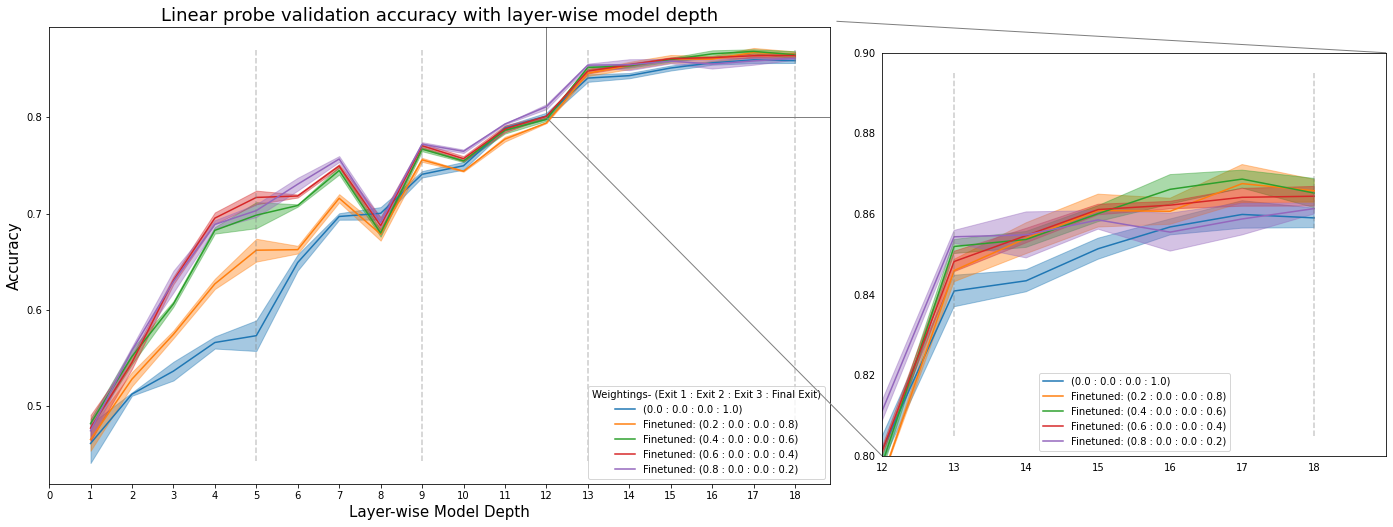

In [25]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots()


color = 0

plot_accuracies(unbranched_mean,unbranched_std,'(0.0 : 0.0 : 0.0 : 1.0)',('C'+str(color)))
color=color+1

# for model in range(len(single_branch_weights)):
#     plot_accuracies(single_means[model],single_stds[model],get_label(single_branches[model]),('C'+str(color)))
#     color=color+1

# for model in range(len(second_branch_weights)):
#     plot_accuracies(second_means[model],second_stds[model],get_label(second_branches[model]),('C'+str(color)))
#     color=color+1
    
# for model in range(len(third_branch_weights)):
#     plot_accuracies(third_means[model],third_stds[model],get_label(third_branches[model]),('C'+str(color)))
#     color=color+1
    
# for model in range(len(multi_branch_weights)):
#     plot_accuracies(multi_means[model],multi_stds[model],get_label(multi_branches[model]),('C'+str(color)))
#     color=color+1
    
# for model in range(len(pretrained_weights)):
#     plot_accuracies(pretrained_means[model],pretrained_stds[model],('Pretrained: ' + get_label(pretrained_branches[model])),('C'+str(color)))
#     color=color+1
    
for model in range(len(finetuned_weights)):
    plot_accuracies(finetuned_means[model],finetuned_stds[model],('Finetuned: ' + get_label(finetuned_branches[model])),('C'+str(color)))
    color=color+1
    
# for model in range(len(hierarchical_weights)):
#     plot_accuracies(hierarchical_means[model],hierarchical_stds[model],('Hierarchical- ' + get_label(single_branches[model])),('C'+str(color)))
#     color=color+1
    
plt.title('Linear probe validation accuracy with layer-wise model depth', size=18)
plt.xlabel("Layer-wise Model Depth", size=15)
plt.ylabel("Accuracy", size=15)
plt.legend(title='Weightings- (Exit 1 : Exit 2 : Exit 3 : Final Exit)',loc=4)
plt.xticks(np.arange(0,unbranched_mean.shape[0]+1))

plt.axvline(x=5,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
plt.axvline(x=9,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
plt.axvline(x=13,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
plt.axvline(x=18,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')

axins = inset_axes(ax, width=width/1.2, height=height/2.5, bbox_to_anchor=(1.06,0.05), loc=3, bbox_transform=ax.transAxes)

color = 0

plot_accuracies(unbranched_mean,unbranched_std,'(0.0 : 0.0 : 0.0 : 1.0)',('C'+str(color)))
color=color+1

# for model in range(len(single_branch_weights)):
#     plot_accuracies(single_means[model],single_stds[model],get_label(single_branches[model]),('C'+str(color)))
#     color=color+1

# for model in range(len(second_branch_weights)):
#     plot_accuracies(second_means[model],second_stds[model],get_label(second_branches[model]),('C'+str(color)))
#     color=color+1
    
# for model in range(len(third_branch_weights)):
#     plot_accuracies(third_means[model],third_stds[model],get_label(third_branches[model]),('C'+str(color)))
#     color=color+1
    
# for model in range(len(multi_branch_weights)):
#     plot_accuracies(multi_means[model],multi_stds[model],get_label(multi_branches[model]),('C'+str(color)))
#     color=color+1
    
# for model in range(len(pretrained_weights)):
#     plot_accuracies(pretrained_means[model],pretrained_stds[model],('Pretrained: ' + get_label(pretrained_branches[model])),('C'+str(color)))
#     color=color+1
    
for model in range(len(finetuned_weights)):
    plot_accuracies(finetuned_means[model],finetuned_stds[model],('Finetuned: ' + get_label(finetuned_branches[model])),('C'+str(color)))
    color=color+1
    
# for model in range(len(hierarchical_weights)):
#     plot_accuracies(hierarchical_means[model],hierarchical_stds[model],('Hierarchical- ' + get_label(single_branches[model])),('C'+str(color)))
#     color=color+1

plt.axvline(x=5,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
plt.axvline(x=9,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')
plt.axvline(x=13,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')

plt.xticks(np.arange(0,unbranched_mean.shape[0]+1))
plt.axvline(x=18,ls='--',ymin=0.05,ymax=0.95,alpha=0.4,color='grey')

# sub region of the original image
x1, x2, y1, y2 = 12,19,0.80,0.90
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

axins.tick_params(axis = "x", which = "both", bottom = False, top = False)
axins.tick_params(axis = "y", which = "both", left = False, right = False)
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
axins.legend()

plt.savefig(save_directory+'boxed-linear-probes.pdf', bbox_inches = 'tight')
plt.show()